# Welcome to the Pylake Tutorial
## This notebook present a simple example for the use of Pylake
Note: 
* Created for Pylake 0.0.13
* Here we use a simple 1D data, however the package is build with xarray, meaning that xarray dataset are well included and optimized
* If an xarray is passed, the dimensions of time and depth must be named "time" and "depth" respectively

Import the necessary packages: 

In [1]:
import pylake
import numpy as np
import seawater as sw
import matplotlib.pyplot as plt

Very simple dataset (1D): temperature column

In [2]:
Temp = np.array([14.3,14,12.1,10,9.7,9.5,6,5])
depth = np.array([1,2,3,4,5,6,7,8])

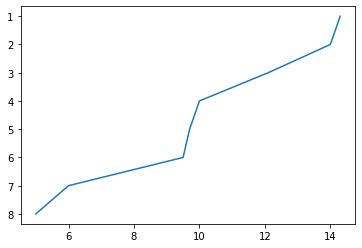

In [3]:
plt.plot(Temp, depth)
plt.gca().invert_yaxis()

Let's start with methods that just takes temperature and depth as input: 
* Thermocline
* Seasonal thermocline
* Epilimnion depth and Hypolimnion depth 
* Mixed layer depth 
* Buoyancy frequency

In [4]:
thermoD, thermoInd = pylake.thermocline(Temp, depth)
epilimnion, hypolimnion = pylake.metalimnion(Temp, depth)
SthermoD, SthermoInd = pylake.seasonal_thermocline(Temp,depth)
hML = pylake.mixed_layer(Temp,depth, threshold=0.4)
n2 = pylake.buoyancy_freq(Temp, depth, g=9.81)

Some other methods needs more input data: 
* Bathymetry (area vs depth)
* Fetch length (along the distance from the wind direction), can be an averaged diameter.
* Friction velocity 

Some other input can be calculated with the data that we already produced 
* Average layer density
* epilimnion and hypolimnion density difference

In [5]:
bthA = np.array([100,90,86,82,20,1])
bthD = np.array([0,2.3,2.5,4.2,5.8,7])
Lo = 50
ustar = 0.5

avg_ep_T = pylake.Average_layer_temp(Temp, depth=depth, depth_ref=epilimnion, layer='top')
avg_ep_rho = sw.dens0(s=0.2,t=avg_ep_T)
avg_hyp_T = pylake.Average_layer_temp(Temp, depth=depth, depth_ref=hypolimnion, layer='bot')
avg_hyp_rho = sw.dens0(s=0.2,t=avg_hyp_T)
delta_rho = avg_hyp_rho-avg_ep_rho



Here are some of the methods implemented by Pylake: 
* Wedderburn number 
* Schmidt stability
* heat content
* Seiche periode Monismith (1986)
* Lake number 

In [6]:
W = pylake.wedderburn(delta_rho, metaT=epilimnion, uSt=ustar, AvHyp_rho=avg_hyp_rho, Lo=Lo, g=9.81)

Schmidt_stability = pylake.schmidt_stability(Temp, depth=depth, bthA=bthA, bthD=bthD, sal = 0.2, g=9.81, dz=0.1)

heat_content = pylake.heat_content(Temp, bthA=bthA, bthD=bthD, depth=depth, s=0.2)

seiche_period_1 = pylake.seiche_period_1(depth=depth, Zt=thermoD, Lt=Lo, delta_rho=delta_rho, AvHyp_rho=avg_hyp_rho, g= 9.81)

Lake_number = pylake.Lake_number(bthA=bthA, bthD=bthD, ustar=ustar, St=Schmidt_stability, metaT=epilimnion, metaB=hypolimnion, averageHypoDense=avg_hyp_rho, g=9.81)